---
---
# Understanding Canonicalization 
---

In [1]:
###########
# IMPORTS #
###########

%config InlineBackend.figure_formats = ['svg']
import quimb.tensor as qtn # Tensor Network library
import numpy as np

# Images display and plots
import matplotlib.pyplot as plt


In [2]:
bdim = 5       # Bond dimension
particles = 3  # Number of particles - rank of the full tensor


### Non Canonicalized

In [20]:
# Create a simple MPS network randomly initialized
mps = qtn.MPS_rand_state(L=particles, bond_dim=bdim)

In [21]:
mps.show()

 5 5 
●─●─●
│ │ │


In [26]:
# Contract the leftmost with itself
print(mps.tensors[0])
res = np.einsum('ij,kj', mps.H.tensors[0].data, mps.tensors[0].data) 
print('\nU.H_(ik)U_(ij) :\n {}'.format(res) )

print('\n ^Not diagonal')

Tensor(shape=(5, 2), inds=('_6b0ad6AAAAO', 'k0'), tags=oset(['I0']), backend='numpy', dtype='float64')

U.H_(ik)U_(ij) :
 [[ 0.2943594  -0.06838413  0.30661825  0.06174933  0.430925  ]
 [-0.06838413  0.4213259   0.32882502 -0.13016627  0.408048  ]
 [ 0.30661825  0.32882502  0.71413396 -0.04996253  0.95028385]
 [ 0.06174933 -0.13016627 -0.04996253  0.04603981 -0.05476712]
 [ 0.430925    0.408048    0.95028385 -0.05476712  1.26775077]]

 ^Not diagonal


### Left Canonical

In [40]:
# Create a simple MPS network randomly initialized
mps1 = qtn.MPS_rand_state(L=particles, bond_dim=bdim, normalize=False)

In [41]:
print('Full contraction: {}'.format(mps1.H @ mps1))

Full contraction: 0.3724049757564379


In [42]:
mps1.left_canonize() # left canonicalization (leftmost will be orthogonal, right not)

In [43]:
print('Full contraction: {}'.format(mps1.H @ mps1))

Full contraction: 0.37240497575643783


In [44]:
mps1.show()

 2 4 
>─>─●
│ │ │


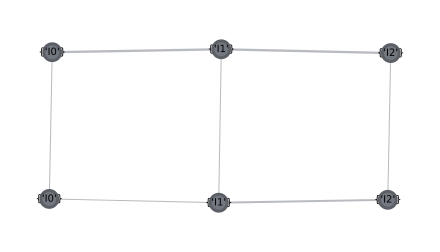

In [45]:
(mps1.H & mps).draw()

In [46]:
# Contract the leftmost with itself
print(mps1.tensors[0])
res = np.einsum('ij,kj', mps1.H.tensors[0].data, mps1.tensors[0].data) 
print('\nU.H_(ij)U_(kj) :\n {}'.format(res) )

print('\n ^Diagonal')

Tensor(shape=(2, 2), inds=('_6b0ad6AAAAg', 'k0'), tags=oset(['I0']), backend='numpy', dtype='float64')

U.H_(ij)U_(kj) :
 [[1. 0.]
 [0. 1.]]

 ^Diagonal


In [47]:
# Contract the middle one with itself
print(mps1.tensors[1])
res = np.einsum('abc,aec', mps1.H.tensors[1].data, mps1.tensors[1].data) # first and last index
print('\nU.H_(ik)U_(ij) :\n {}'.format(res) )

print('\n ^Diagonal')

Tensor(shape=(2, 4, 2), inds=('_6b0ad6AAAAg', '_6b0ad6AAAAh', 'k1'), tags=oset(['I1']), backend='numpy', dtype='float64')

U.H_(ik)U_(ij) :
 [[ 1.00000000e+00  0.00000000e+00  5.55111512e-17 -2.77555756e-17]
 [ 0.00000000e+00  1.00000000e+00  5.55111512e-17  5.55111512e-17]
 [ 5.55111512e-17  5.55111512e-17  1.00000000e+00  1.11022302e-16]
 [-2.77555756e-17  5.55111512e-17  1.11022302e-16  1.00000000e+00]]

 ^Diagonal


Canonicalization is useful when computing Z:

$$Z = \sum_{v\in\mathcal{V}}{|\psi(v)|^2} = \sum_{v\in\mathcal{V}} <\psi|v><v|\psi> = <\psi|\psi>$$

Namely the contractionof the full network with itself

In [48]:
mps1.H @ mps1

0.37240497575643783

In [49]:
# Contract the last one with itself
print(mps1.tensors[-1])
res = np.einsum('ij,ij', mps1.H.tensors[-1].data, mps1.tensors[-1].data)
print('\nU.H_(ik)U_(ij) :\n {}'.format(res) )


Tensor(shape=(4, 2), inds=('_6b0ad6AAAAh', 'k2'), tags=oset(['I2']), backend='numpy', dtype='float64')

U.H_(ik)U_(ij) :
 0.37240497575643794
